<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/callback_CP_IBM_Ponder_this_Challenge_Jan_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 30.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

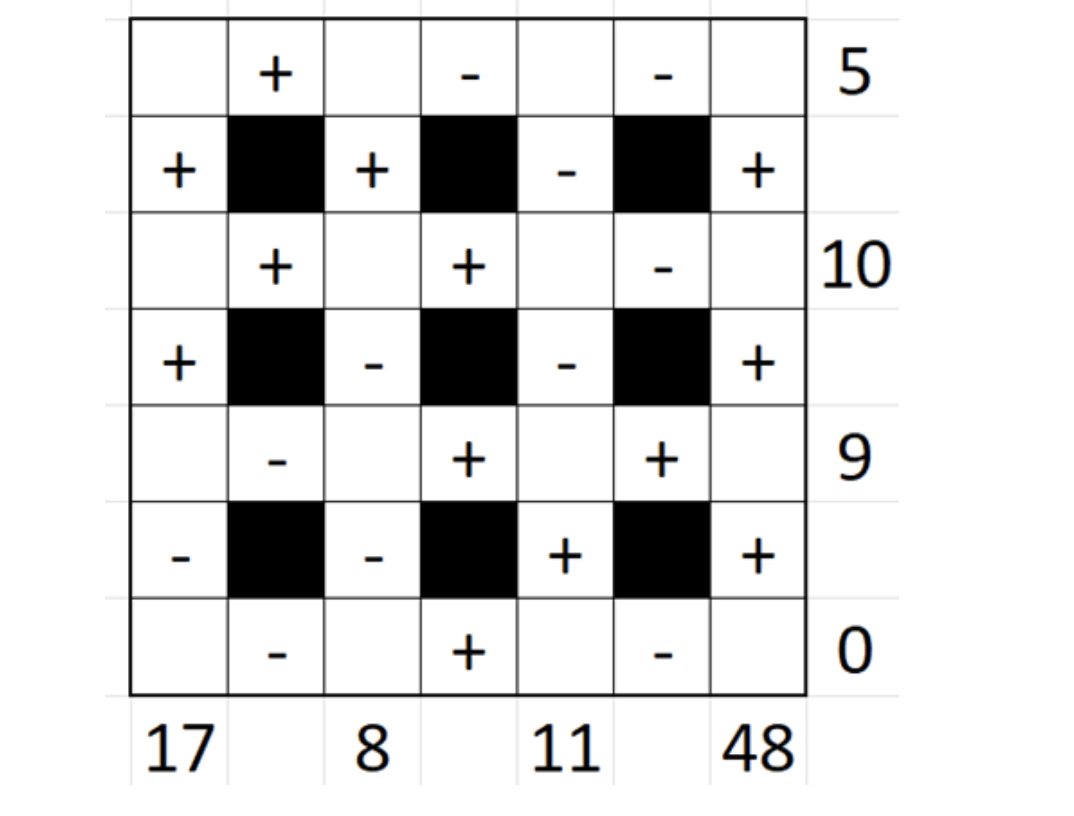

In [7]:
from ortools.sat.python import cp_model
class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0

    def on_solution_callback(self):
        self.__solution_count += 1
        for x,v in self.__variables.items():
            print(f"X{x}={self.Value(v)}", end=" ")
        print()

    def solution_count(self):
        return self.__solution_count


In [13]:
def SearchForAllSolutionsSampleSat():
    """Showcases calling the solver to search for all solutions."""
    # Creates the model.
    model = cp_model.CpModel()
    num_vals = 16
    x = {i:model.NewIntVar(1, num_vals, "x") for i in range(1,num_vals+1)}
    model.Add(x[1]+x[2]-x[3]-x[4] == 5)
    model.Add(x[5]+x[6]+x[7]-x[8] == 10)
    model.Add(x[9]-x[10]+x[11]+x[12] == 9)
    model.Add(x[13]-x[14]+x[15]-x[16] == 0)


    model.Add(x[1]+x[5]+x[9]-x[13] == 17)
    model.Add(x[2]+x[6]-x[10]-x[14] == 8)
    model.Add(x[3]-x[7]-x[11]+x[15] == 11)
    model.Add(x[4]+x[8]+x[12]+x[16] == 48)

    model.AddAllDifferent([v for id,v in x.items()])

    # Create a solver and solve.
    solver = cp_model.CpSolver()
    solution_printer = VarArraySolutionPrinter(x)
    # Enumerate all solutions.
    solver.parameters.enumerate_all_solutions = True
    # Solve.
    status = solver.Solve(model, solution_printer)

    print(f"Status = {solver.StatusName(status)}")
    print(f"Number of solutions found: {solution_printer.solution_count()}")


SearchForAllSolutionsSampleSat()

X1=7 X2=10 X3=8 X4=4 X5=9 X6=11 X7=6 X8=16 X9=3 X10=12 X11=5 X12=13 X13=2 X14=1 X15=14 X16=15 
X1=13 X2=12 X3=6 X4=14 X5=5 X6=9 X7=4 X8=8 X9=1 X10=10 X11=7 X12=11 X13=2 X14=3 X15=16 X16=15 
X1=6 X2=16 X3=9 X4=8 X5=12 X6=2 X7=10 X8=14 X9=4 X10=7 X11=1 X12=11 X13=5 X14=3 X15=13 X16=15 
X1=12 X2=10 X3=4 X4=13 X5=11 X6=7 X7=6 X8=14 X9=3 X10=1 X11=2 X12=5 X13=9 X14=8 X15=15 X16=16 
X1=13 X2=8 X3=7 X4=9 X5=2 X6=16 X7=6 X8=14 X9=5 X10=12 X11=1 X12=15 X13=3 X14=4 X15=11 X16=10 
X1=12 X2=9 X3=5 X4=11 X5=14 X6=8 X7=3 X8=15 X9=1 X10=2 X11=4 X12=6 X13=10 X14=7 X15=13 X16=16 
X1=7 X2=15 X3=11 X4=6 X5=13 X6=4 X7=9 X8=16 X9=2 X10=8 X11=1 X12=14 X13=5 X14=3 X15=10 X16=12 
X1=6 X2=16 X3=7 X4=10 X5=9 X6=8 X7=4 X8=11 X9=3 X10=14 X11=5 X12=15 X13=1 X14=2 X15=13 X16=12 
X1=6 X2=16 X3=8 X4=9 X5=10 X6=7 X7=4 X8=11 X9=3 X10=14 X11=5 X12=15 X13=2 X14=1 X15=12 X16=13 
X1=6 X2=16 X3=8 X4=9 X5=12 X6=7 X7=2 X8=11 X9=3 X10=14 X11=5 X12=15 X13=4 X14=1 X15=10 X16=13 
X1=6 X2=15 X3=9 X4=7 X5=10 X6=8 X7=5 X8=13 X9=3 X1